In [1]:
import requests
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import cov
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
! pip install numpy scikit-learn statsmodels

In [2]:
apikey = "14a2c22344444a2fac18026e71f60bf8"
url_current_state_data = f'https://api.covidactnow.org/v2/states.json?apiKey={apikey}'

###  Parse the api for current metrics and use states as our index

In [3]:
jsn = requests.get(url_current_state_data).json()
df_current_metrics = pd.DataFrame([item['metrics'] for item in jsn], index=[item['state'] for item in jsn] )
df_current_metrics.head()

,testPositivityRatio,testPositivityRatioDetails,caseDensity,weeklyNewCasesPer100k,contactTracerCapacityRatio,infectionRate,infectionRateCI90,icuCapacityRatio,bedsWithCovidPatientsRatio,weeklyCovidAdmissionsPer100k,vaccinationsInitiatedRatio,vaccinationsCompletedRatio,vaccinationsAdditionalDoseRatio,vaccinationsFall2022BivalentBoosterRatio
AK,0.068,{'source': 'other'},7.0,49.3,None,0.85,0.24,0.72,0.012,3.8,0.732,0.652,0.324,0.139
AL,0.037,{'source': 'other'},4.5,31.8,None,1.03,0.10,0.79,0.011,2.7,0.651,0.532,0.212,0.075
AR,0.063,{'source': 'other'},3.4,23.7,None,1.22,0.12,0.76,0.020,3.7,0.700,0.570,0.254,0.108
AZ,0.096,{'source': 'other'},6.7,46.8,None,1.15,0.10,0.64,0.033,4.5,0.783,0.662,0.332,0.154
CA,0.052,{'source': 'other'},4.5,31.7,None,1.05,0.10,0.74,0.029,4.2,0.850,0.749,0.441,0.203


In [4]:
df_current_metrics.cov() 
# We wanted to look at relationships between variables before creating visualizations and performing other analysis

,testPositivityRatio,caseDensity,weeklyNewCasesPer100k,infectionRate,infectionRateCI90,icuCapacityRatio,bedsWithCovidPatientsRatio,weeklyCovidAdmissionsPer100k,vaccinationsInitiatedRatio,vaccinationsCompletedRatio,vaccinationsAdditionalDoseRatio,vaccinationsFall2022BivalentBoosterRatio
testPositivityRatio,0.001095,0.027079,0.190365,0.000481,-0.000251,-0.000293,0.000024,0.007527,-0.001002,-0.001104,-0.000897,-0.000683
caseDensity,0.027079,3.154163,22.078884,0.070802,-0.159692,-0.014148,0.000642,0.560835,-0.032393,-0.028306,-0.004919,-0.021856
weeklyNewCasesPer100k,0.190365,22.078884,154.581976,0.491926,-1.115884,-0.097832,0.004370,3.945957,-0.228368,-0.200459,-0.036917,-0.154083
infectionRate,0.000481,0.070802,0.491926,0.022005,-0.010165,0.002257,0.000315,0.001278,0.000593,-0.000735,-0.001456,-0.001821
infectionRateCI90,-0.000251,-0.159692,-1.115884,-0.010165,0.038478,-0.001427,-0.000175,0.024146,0.003182,0.003437,0.001134,-0.001511
icuCapacityRatio,-0.000293,-0.014148,-0.097832,0.002257,-0.001427,0.009719,0.000211,-0.002158,0.000183,0.000443,0.000154,-0.000101
bedsWithCovidPatientsRatio,0.000024,0.000642,0.004370,0.000315,-0.000175,0.000211,0.000064,0.002441,0.000079,0.000075,0.000115,0.000144
weeklyCovidAdmissionsPer100k,0.007527,0.560835,3.945957,0.001278,0.024146,-0.002158,0.002441,0.956482,-0.001269,-0.002936,0.001439,0.009019
vaccinationsInitiatedRatio,-0.001002,-0.032393,-0.228368,0.000593,0.003182,0.000183,0.000079,-0.001269,0.012180,0.010457,0.007961,0.004864
vaccinationsCompletedRatio,-0.001104,-0.028306,-0.200459,-0.000735,0.003437,0.000443,0.000075,-0.002936,0.010457,0.009902,0.008311,0.004681


### Importing and Cleaning Election Data 

In [5]:
url_votes = "https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv"

In [6]:
df_votes = pd.read_csv(url_votes)
df_votes.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


In [7]:
df_votes = df_votes.set_index('state_name')
df_votes
gop_votes = df_votes.groupby('state_name')['votes_gop'].sum()
dem_votes = df_votes.groupby('state_name')['votes_dem'].sum()
total_votes_in_state = df_votes.groupby('state_name')['total_votes'].sum() 

In [8]:
df_voting=pd.concat([gop_votes,total_votes_in_state, dem_votes],axis=1)
df_voting['vote share for GOP'] = df_voting["votes_gop"]/df_voting["total_votes"]
df_voting['vote share for DEM'] = df_voting['votes_dem']/df_voting['total_votes']
df_voting.head()

,votes_gop,total_votes,votes_dem,vote share for GOP,vote share for DEM
state_name,,,,,
Alabama,1441168,2323304,849648,0.620310,0.365707
Alaska,189892,391346,153405,0.485228,0.391993
Arizona,1661686,3387326,1672143,0.490560,0.493647
Arkansas,760647,1219069,423932,0.623957,0.347751
California,6005961,17495906,11109764,0.343278,0.634992


In [9]:
df_current_metrics_new = df_current_metrics.drop(['PR', 'MP'])
# The api included Puerto Rico and Northern Marina Islands but our eletion data is just states so we create a new df and drop those columns

### Parse the api for the actuals data which is cumulative data from start of Pandemic

In [10]:
df_current_actuals = pd.DataFrame([item['actuals'] for item in jsn], index=[item['state'] for item in jsn] )
df_current_actuals

,cases,deaths,positiveTests,negativeTests,contactTracers,hospitalBeds,hsaHospitalBeds,icuBeds,hsaIcuBeds,newCases,newDeaths,vaccinesDistributed,vaccinationsInitiated,vaccinationsCompleted,vaccinationsAdditionalDose,vaccinationsFall2022BivalentBooster,vaccinesAdministered,vaccinesAdministeredDemographics,vaccinationsInitiatedDemographics
AK,296922,1468,398795,4383485,235,"{'capacity': 1298, 'currentUsageTotal': 950, '...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 127, 'currentUsageTotal': 91, 'cu...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,2158775.0,535364.0,477333.0,237166.0,101944.0,1324490.0,None,None
AL,1655661,21133,1288797,8004012,404,"{'capacity': 11594, 'currentUsageTotal': 8206,...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 1368, 'currentUsageTotal': 1075, ...","{'capacity': None, 'currentUsageTotal': None, ...",1560,0,12296740.0,3191535.0,2610498.0,1040461.0,369560.0,7008089.0,None,None
AR,991724,13074,581303,4810592,790,"{'capacity': 6649, 'currentUsageTotal': 4560, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 774, 'currentUsageTotal': 589, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",714,0,8333870.0,2113686.0,1719258.0,767517.0,326584.0,4865155.0,None,None
AZ,2464334,33372,2217707,14026996,396,"{'capacity': 13248, 'currentUsageTotal': 10084...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 1509, 'currentUsageTotal': 964, '...","{'capacity': None, 'currentUsageTotal': None, ...",3408,0,19809520.0,5696966.0,4818541.0,2414461.0,1119889.0,14605599.0,None,None
CA,12218091,101555,11792100,160306226,10600,"{'capacity': 58662, 'currentUsageTotal': 46704...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 6306, 'currentUsageTotal': 4647, ...","{'capacity': None, 'currentUsageTotal': None, ...",12518,0,120242535.0,33589831.0,29576417.0,17433884.0,8014499.0,88239336.0,None,None
CO,1778036,14319,1787446,17466584,1300,"{'capacity': 7808, 'currentUsageTotal': 4741, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 931, 'currentUsageTotal': 475, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",1929,0,17678745.0,4833756.0,4244917.0,2455358.0,1244870.0,12995318.0,None,None
CT,981026,12303,1103047,15627007,860,"{'capacity': 7457, 'currentUsageTotal': 5909, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 895, 'currentUsageTotal': 635, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",473,0,11815595.0,3666615.0,2965346.0,1650105.0,895396.0,9018935.0,None,None
DC,178667,1434,287433,5550847,268,"{'capacity': 3308, 'currentUsageTotal': 2592, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 319, 'currentUsageTotal': 242, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,NaN,NaN,NaN,NaN,NaN,NaN,None,"{'age': {'12-15': 17298, '16-17': 7709, '16-19..."
DE,333609,3380,363088,3863067,211,"{'capacity': 2409, 'currentUsageTotal': 1868, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 181, 'currentUsageTotal': 121, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,3327515.0,861253.0,715460.0,369436.0,204118.0,2166103.0,None,None
FL,7542869,87141,8403567,58011338,2600,"{'capacity': 51646, 'currentUsageTotal': 38284...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 6047, 'currentUsageTotal': 4333, ...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,61163245.0,17790290.0,14960333.0,6574418.0,2459584.0,42173438.0,None,"{'age': {'12-14': 91571, '15-24': 774834, '25-..."


In [11]:
icu_beds1=df_current_actuals['icuBeds']
icu_beds1

AK    {'capacity': 127, 'currentUsageTotal': 91, 'cu...
AL    {'capacity': 1368, 'currentUsageTotal': 1075, ...
AR    {'capacity': 774, 'currentUsageTotal': 589, 'c...
AZ    {'capacity': 1509, 'currentUsageTotal': 964, '...
CA    {'capacity': 6306, 'currentUsageTotal': 4647, ...
CO    {'capacity': 931, 'currentUsageTotal': 475, 'c...
CT    {'capacity': 895, 'currentUsageTotal': 635, 'c...
DC    {'capacity': 319, 'currentUsageTotal': 242, 'c...
DE    {'capacity': 181, 'currentUsageTotal': 121, 'c...
FL    {'capacity': 6047, 'currentUsageTotal': 4333, ...
GA    {'capacity': 2014, 'currentUsageTotal': 1513, ...
HI    {'capacity': 202, 'currentUsageTotal': 134, 'c...
IA    {'capacity': 539, 'currentUsageTotal': 359, 'c...
ID    {'capacity': 251, 'currentUsageTotal': 175, 'c...
IL    {'capacity': 2876, 'currentUsageTotal': 1715, ...
IN    {'capacity': 1889, 'currentUsageTotal': 1188, ...
KS    {'capacity': 687, 'currentUsageTotal': 481, 'c...
KY    {'capacity': 1060, 'currentUsageTotal': 77

In [12]:
my_list =[]
for i in icu_beds1:
    i=dict(i)
    my_list.append(i['capacity'])

In [13]:
my_list

[127,
 1368,
 774,
 1509,
 6306,
 931,
 895,
 319,
 181,
 6047,
 2014,
 202,
 539,
 251,
 2876,
 1889,
 687,
 1060,
 1246,
 1223,
 1165,
 289,
 2299,
 817,
 1635,
 None,
 550,
 197,
 2156,
 211,
 482,
 239,
 2761,
 373,
 805,
 4245,
 3627,
 865,
 597,
 3379,
 589,
 149,
 1132,
 220,
 1891,
 5773,
 507,
 1902,
 96,
 1002,
 1223,
 592,
 97]

In [14]:
df_current_actuals['IcuBedsCapacity'] = my_list

In [15]:
df_population= pd.DataFrame([item['population'] for item in jsn], index=[item['state'] for item in jsn] )
df_population.head()
# Get the state populations so we can do analysis based on rates 

,0
AK,731545
AL,4903185
AR,3017804
AZ,7278717
CA,39512223


In [16]:
df_current_actuals["population"] = df_population

In [17]:
df_current_actuals_new = df_current_actuals.drop(['PR', 'MP'])
# The api included Puerto Rico and Northern Marina Islands but our eletion data is just states so we create a new df and drop those columns

In [18]:
df_analyze = pd.DataFrame()

In [19]:
df_analyze["DeathsPer100k"] = df_current_actuals_new["deaths"]/df_current_actuals_new["population"] *100000
df_analyze["VaccinationsCompletedPercentage"] = df_current_actuals_new["vaccinationsCompleted"]/df_current_actuals_new["population"] *100
df_analyze["Percentage_with_Booster"] = df_current_actuals_new["vaccinationsAdditionalDose"]/df_current_actuals_new["population"] *100
df_analyze["ICU_Capacity_Ratio"] = df_current_metrics["icuCapacityRatio"]
df_analyze['IcuBeds']= df_current_actuals['IcuBedsCapacity']

In [20]:
df_analyze.head()

,DeathsPer100k,VaccinationsCompletedPercentage,Percentage_with_Booster,ICU_Capacity_Ratio,IcuBeds
AK,200.671182,65.249985,32.419878,0.72,127.0
AL,431.005561,53.240863,21.220105,0.79,1368.0
AR,433.228931,56.970499,25.432964,0.76,774.0
AZ,458.487396,66.200417,33.171519,0.64,1509.0
CA,257.021732,74.853842,44.122762,0.74,6306.0


In [21]:
mean_value_VaccinationsCompletedPercentage=df_analyze['VaccinationsCompletedPercentage'].mean()
df_analyze['VaccinationsCompletedPercentage'].fillna(value=mean_value_VaccinationsCompletedPercentage, inplace=True)

In [22]:
mean_value_Percentage_with_Booster=df_analyze['Percentage_with_Booster'].mean()
df_analyze['Percentage_with_Booster'].fillna(value=mean_value_Percentage_with_Booster, inplace=True)

In [23]:
df_analyze['Percentage_with_Booster'].isnull()

AK    False
AL    False
AR    False
AZ    False
CA    False
CO    False
CT    False
DC    False
DE    False
FL    False
GA    False
HI    False
IA    False
ID    False
IL    False
IN    False
KS    False
KY    False
LA    False
MA    False
MD    False
ME    False
MI    False
MN    False
MO    False
MS    False
MT    False
NC    False
ND    False
NE    False
NH    False
NJ    False
NM    False
NV    False
NY    False
OH    False
OK    False
OR    False
PA    False
RI    False
SC    False
SD    False
TN    False
TX    False
UT    False
VA    False
VT    False
WA    False
WI    False
WV    False
WY    False
Name: Percentage_with_Booster, dtype: bool

In [24]:
df_analyze["VaccinationsCompletedPercentage"]=df_analyze["VaccinationsCompletedPercentage"].round(decimals=2)
df_analyze["Percentage_with_Booster"] = df_analyze["Percentage_with_Booster"].round(decimals=2)

In [25]:
df_analyze["DeathsPer100k"] = df_analyze['DeathsPer100k'].round(decimals=2)

In [26]:
df_analyze.head()

,DeathsPer100k,VaccinationsCompletedPercentage,Percentage_with_Booster,ICU_Capacity_Ratio,IcuBeds
AK,200.67,65.25,32.42,0.72,127.0
AL,431.01,53.24,21.22,0.79,1368.0
AR,433.23,56.97,25.43,0.76,774.0
AZ,458.49,66.20,33.17,0.64,1509.0
CA,257.02,74.85,44.12,0.74,6306.0


In [27]:
df_analyze['icuBedsper100k'] = df_analyze['IcuBeds']/df_current_actuals["population"] *100000
df_analyze["icuBedsper100k"] = df_analyze["icuBedsper100k"].round(decimals=2)

In [28]:
df_analyze.head()

,DeathsPer100k,VaccinationsCompletedPercentage,Percentage_with_Booster,ICU_Capacity_Ratio,IcuBeds,icuBedsper100k
AK,200.67,65.25,32.42,0.72,127.0,17.36
AL,431.01,53.24,21.22,0.79,1368.0,27.90
AR,433.23,56.97,25.43,0.76,774.0,25.65
AZ,458.49,66.20,33.17,0.64,1509.0,20.73
CA,257.02,74.85,44.12,0.74,6306.0,15.96


<AxesSubplot:>

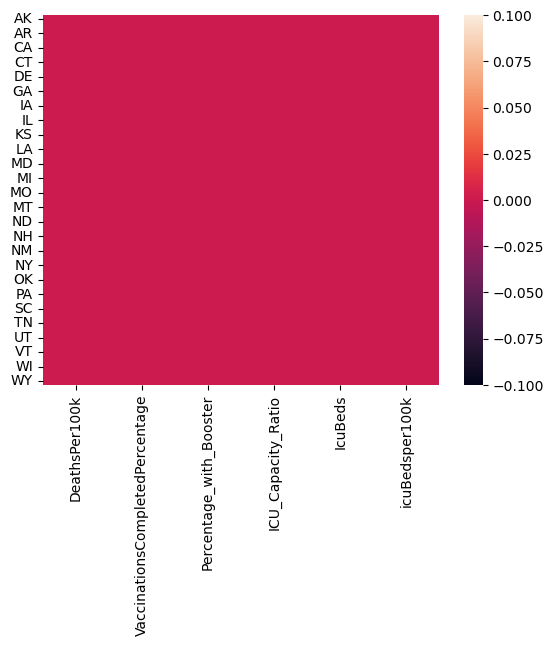

In [29]:
columns = df_analyze.columns 
sns.heatmap(df_analyze[columns].isnull()) 

# GUI displaying our Data Visualizations

In [30]:
from tkinter import *
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [31]:
root = Tk()
root.geometry("1000x500")
root.title('Start Page')



def open_window1():
    window = tk.Toplevel(root)
    window.title('Case Density')
    window.geometry("2000x1000")
    
    fig, axs = plt.subplots(2, 2, figsize=(15,15))
    axs[0,0].scatter(df_current_metrics['vaccinationsCompletedRatio'], df_current_metrics['caseDensity'], color='blue')
    axs[0,0].set_title('Current Vaccine Initiated Ratio vs Case Density')
    axs[0,0].set_xlabel("Vaccines Completed Ratio")
    axs[0,0].set_ylabel("Case Density, %")

    
    axs[0,1].scatter(df_voting["vote share for GOP"], df_current_metrics_new['caseDensity'], color='red')
    axs[0,1].set_title('Vote Share for GOP vs Case Density')
    axs[0,1].set_xlabel("Vote Share for GOP")
    axs[0,1].set_ylabel("Case Density%")
    
    axs[1,0].scatter(df_analyze['Percentage_with_Booster'], df_current_metrics_new['caseDensity'], color='orange')
    axs[1,0].set_title('Precent Boosted vs Case Density')
    axs[1,0].set_xlabel("Percent Boosted")
    axs[1,0].set_ylabel("Case Density, %")

    axs[1,1].scatter(df_voting["vote share for DEM"], df_current_metrics_new['caseDensity'], color='blue')
    axs[1,1].set_title('Vote Share for DEM vs Case Density')
    axs[1,1].set_xlabel("Vote Share for DEM")
    axs[1,1].set_ylabel("Case Density%")
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()
    
def open_window2():
    
    window=tk.Toplevel(root)
    window.title('Death Rate')
    window.geometry("1500x1000")
                    
    fig, axs = plt.subplots(2, 2, figsize=(15,15))
    
    axs[0,0].scatter(df_analyze["VaccinationsCompletedPercentage"], df_analyze["DeathsPer100k"], color='Blue')
    axs[0,0].set_title('Vaccine Completed Percentage VS Death Rate Per 100k')
    axs[0,0].set_xlabel("Vaccine Completed Percentage")
    axs[0,0].set_ylabel("Death Rate per 100k")
    r, p = stats.pearsonr(df_analyze["VaccinationsCompletedPercentage"], df_analyze["DeathsPer100k"])
    axs[0,0].annotate('r = {:.2f}'.format(r), xy=(0.05, 0.1), xycoords='axes fraction')
    
    axs[0,1].scatter(df_analyze['Percentage_with_Booster'], df_analyze['DeathsPer100k'], color='Orange')
    axs[0,1].set_title('Percentage of People Boosted vs Death Rate per 100k')
    axs[0,1].set_xlabel("Percentage of People Boosted")
    axs[0,1].set_ylabel("Death Rate per 100k")
    r, p = stats.pearsonr(df_analyze['Percentage_with_Booster'], df_analyze["DeathsPer100k"])
    axs[0,1].annotate('r = {:.2f}'.format(r), xy=(0.05, 0.1), xycoords='axes fraction')
    
    axs[1,0].scatter(df_current_metrics_new['caseDensity'], df_analyze['DeathsPer100k'], color='Red')
    axs[1,0].set_title('Case Density vs Death Rate per 100k')
    axs[1,0].set_xlabel("Case Density")
    axs[1,0].set_ylabel("Death Rate per 100k")

    
    axs[1,1].scatter(df_current_metrics_new['infectionRate'], df_analyze['DeathsPer100k'], color='Green')
    axs[1,1].set_title('Infection Rate vs Death Rate per 100k')
    axs[1,1].set_xlabel("Infection Rate")
    axs[1,1].set_ylabel("Death Rate per 100k")
    
    
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
        
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()


def open_window3():
    window=tk.Toplevel(root)
    window.geometry("2000x1000")
    window.title('IcuBeds')
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(df_analyze["ICU_Capacity_Ratio"], df_analyze["DeathsPer100k"], color='red')

    plt.title('ICU Capacity Ratio vs DeathsPer100k')
    plt.xlabel('ICU Capacity Ratio')
    plt.ylabel('DeathsPer100k')
    
    r, p = stats.pearsonr(df_analyze["ICU_Capacity_Ratio"], df_analyze["DeathsPer100k"])
    ax.annotate('r = {:.2f}'.format(r), xy=(0.90, 0.1), xycoords='axes fraction')
    
        
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()


def open_window4():
    window = tk.Toplevel(root)
    window.geometry("2000x1000")
    window.title('Case Density')
                 
    fig, axs = plt.subplots(2, 2, figsize=(15,15))
    
    axs[0,0].scatter(df_voting["vote share for GOP"], df_current_metrics_new["infectionRate"], color='red')
    axs[0,0].set_title('Vote share for GOP vs Infection Rate')
    axs[0,0].set_xlabel("Vote Share for GOP")
    axs[0,0].set_ylabel("Infection Rate")
    
    axs[0,1].scatter(df_voting["vote share for DEM"], df_current_metrics_new["infectionRate"], color='blue')
    axs[0,1].set_title('Vote share for DEM vs Infection Rate')
    axs[0,1].set_xlabel("Vote Share for DEM")
    axs[0,1].set_ylabel("Infection Rate")
     
        
    axs[1,0].scatter(df_voting["vote share for GOP"], df_analyze["VaccinationsCompletedPercentage"], color='red')
    axs[1,0].set_title('Vote share for GOP vs Vaccinations Completed Percentage ')
    axs[1,0].set_xlabel("Vote Share for GOP")
    axs[1,0].set_ylabel("Vaccinations Completed")

    
    axs[1,1].scatter(df_voting["vote share for DEM"], df_analyze["VaccinationsCompletedPercentage"], color='blue')
    axs[1,1].set_title('Vote share for DEM vs Vaccinations Completed')
    axs[1,1].set_xlabel("Vote Share for DEM")
    axs[1,1].set_ylabel("Vaccinations Completed")
  
    
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
        
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

raw_response = requests.get(f'https://api.covidactnow.org/v2/states.json?apiKey={apikey}').text
response=json.loads(raw_response)

item_list= ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

def get_all():
    state=value.get()
        
    state_out=requests.get(f'https://api.covidactnow.org/v2/state/{state}.json?apiKey={apikey}').text
    state_response=json.loads(state_out)
    actuals=state_response['actuals']
    cases=actuals['cases']
    cases1=(f'Cumulative confirmed or suspected COVID cases: {cases}')

    vaccines=actuals['vaccinationsCompleted']
    vaccines1=(f'Cumulative number of vaccinations completed: {vaccines}')


    deaths=actuals['deaths']
    deaths1=(f'Cumulative confirmed or suspected COVID deaths: {deaths}')


    metrics=state_response['metrics']
    weekly=metrics['weeklyNewCasesPer100k']
    metrics1=(f'Number of new cases per 100k population over the last week: {weekly}')

    population=state_response['population']
    population1=(f'Vaccination ratio (% of population vaccinated): {vaccines/population}')

    result_label=Label(root, text=f"You've chosen {state}. \n {cases1}\n {vaccines1}\n {deaths1} \n{metrics1} \n{population1}")

    #root.configure(value=value)
    result_label.pack()
    #return(cases1,vaccines1,deaths1,metrics1,population1)
    

label = Label(root, text= 'Welcome to our Covid Data Analysis Page', font=('Nexa', 24))
label.pack(padx=20,pady=20)

button1 = Button(root, text="What Affects Case Density", command= open_window1)
button1.pack(padx=5,pady=5)

button2 = Button(root, text="What Affects Death Rate", command = open_window2)
button2.pack(padx=5,pady=5)

button3 = Button(root, text="ICU Beds", command = open_window3)
button3.pack(padx=5,pady=5)
                 
button4= Button(root, text="Political Preferences", command = open_window4)
button4.pack(padx=5,pady=5)
 
value=StringVar()
value.set("Select a State:")
    
dropdown=OptionMenu(root, value, *item_list)
choose_button=Button(root, text="Click to choose", command=get_all)

dropdown.pack(padx=5, pady=5)
choose_button.pack(padx=5, pady=5)

root.mainloop()

# Simple Regression Analysis of Booster Rates effect on Mortality

In [32]:
from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression

In [33]:
X= df_analyze["Percentage_with_Booster"]
y= df_analyze["DeathsPer100k"]

In [34]:
X = sm.add_constant(X)

In [35]:
import statsmodels.api as sm
sm_model = sm.OLS(y, X)
results = sm_model.fit()

print(results.summary())
                              

                            OLS Regression Results                            
Dep. Variable:          DeathsPer100k   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     17.01
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           0.000144
Time:                        22:10:09   Log-Likelihood:                -291.55
No. Observations:                  51   AIC:                             587.1
Df Residuals:                      49   BIC:                             591.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Our model estimates that for every one percent increase in a given states boosted population, the death rate per 100k for that state is 5.2223 deaths lower.

## Using GEOPANDAS to show regional relationships

In [36]:
!pip install geopandas
!pip install shapely

import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

<AxesSubplot:>

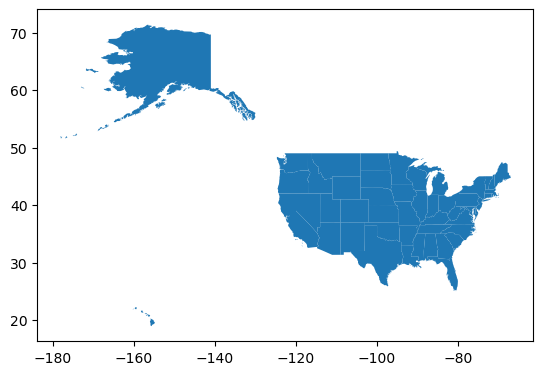

In [37]:
#importing shapefile and reading it
shapefile = "states.geojson"
readmap = gpd.read_file(shapefile)
readmap.plot()

In [38]:
#renaming column names in states shapefile to lowercase (to merge with df_analyze)
readmap = readmap.rename(columns={'Program':'program', 'State_Code':'state_code', 'State_Name':'state_name', 'Flowing_St':'flowing_st'})

#creating column name for index (state_code)
df_analyze_statecol = df_analyze.copy()
df_analyze_statecol.index.name = 'state_code'

#merging shapefile dataframe with COVID dataframe on "state_code" column name
merged_df = readmap.merge(df_analyze_statecol, on="state_code")

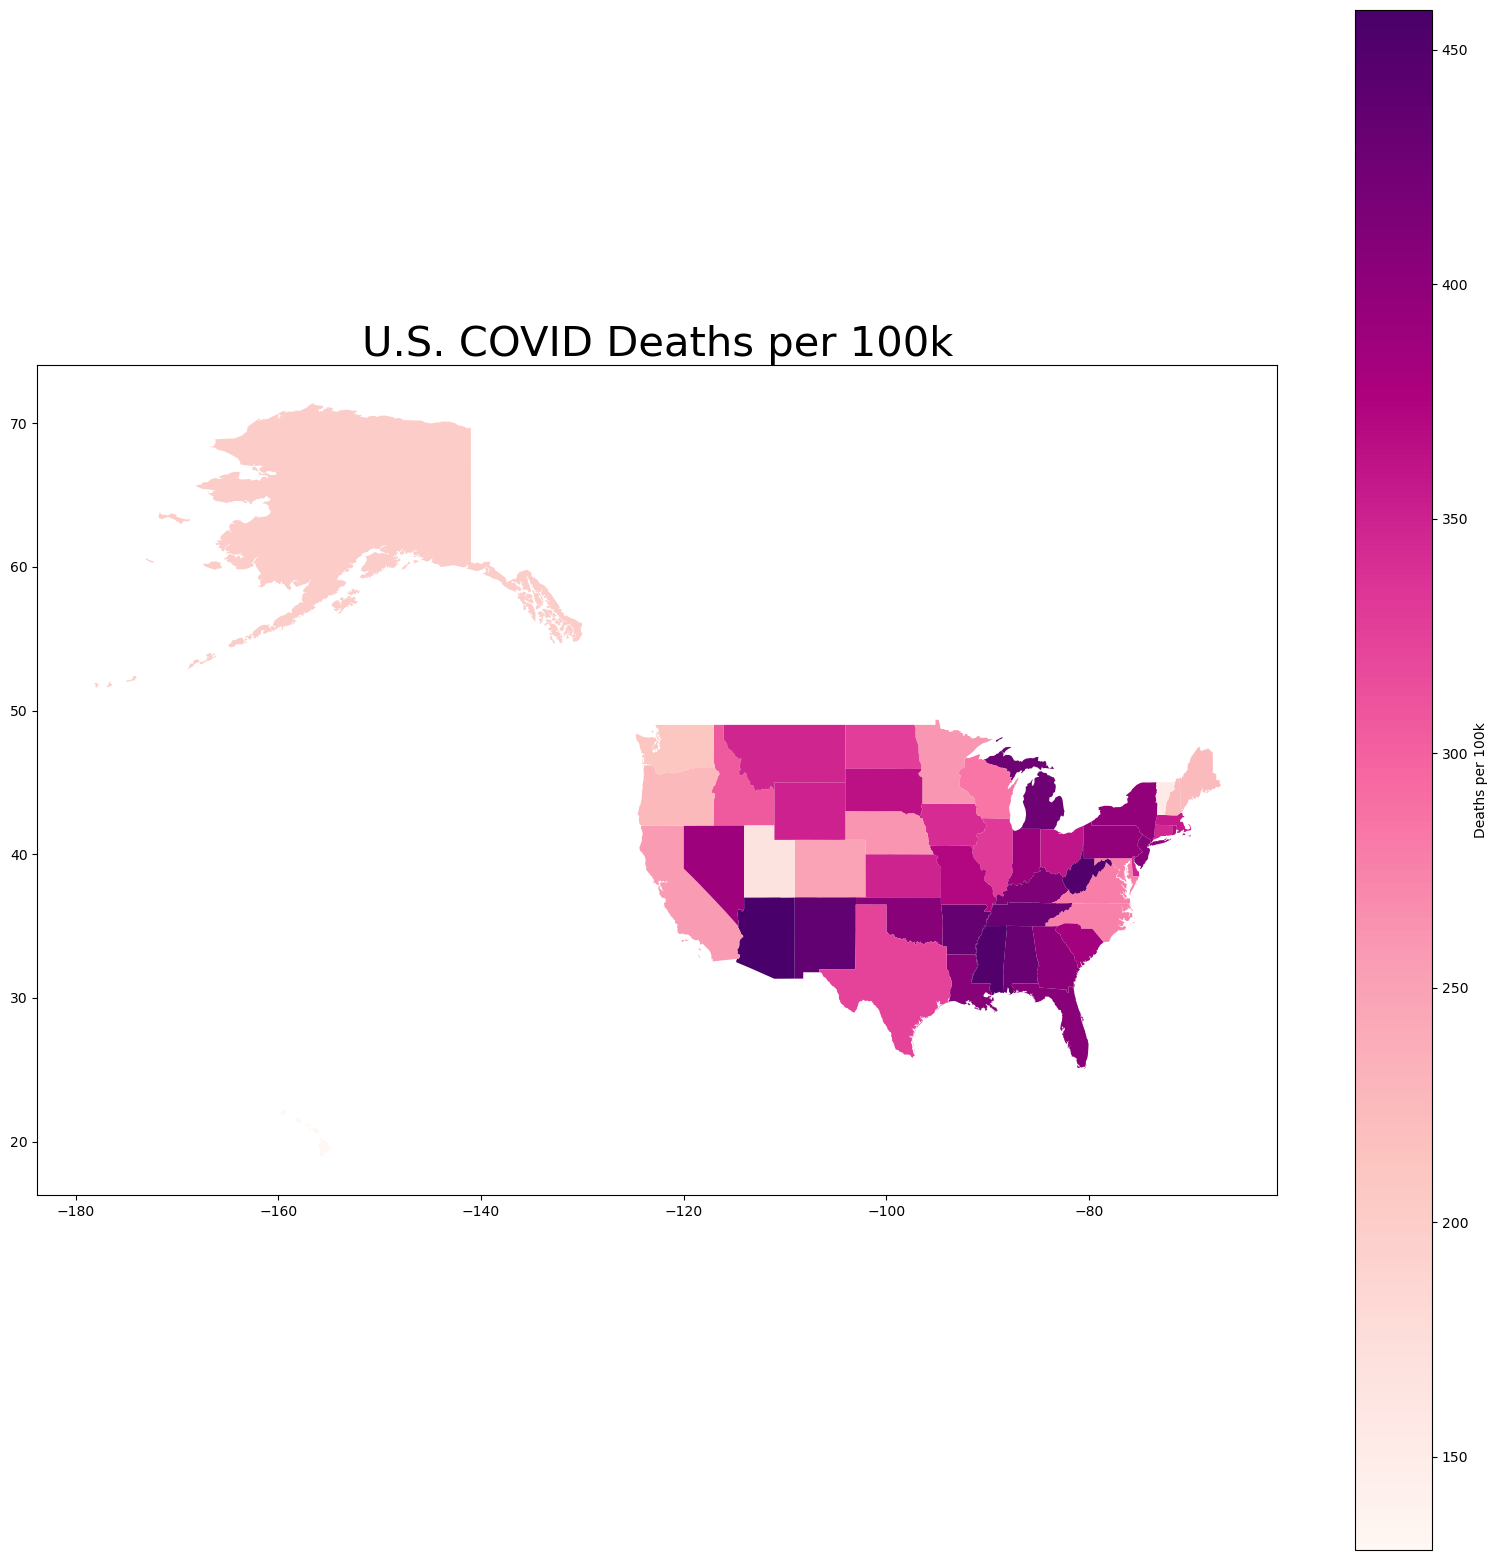

In [39]:
DeathPlot = merged_df.plot(column='DeathsPer100k',
            cmap='RdPu',
            linewidth=0.9,
            figsize=(20,20),
            legend=True,
            legend_kwds={'label':"Deaths per 100k",
                        'orientation':"vertical"})

DeathPlot.set_title("U.S. COVID Deaths per 100k")
DeathPlot.title.set_size(30)

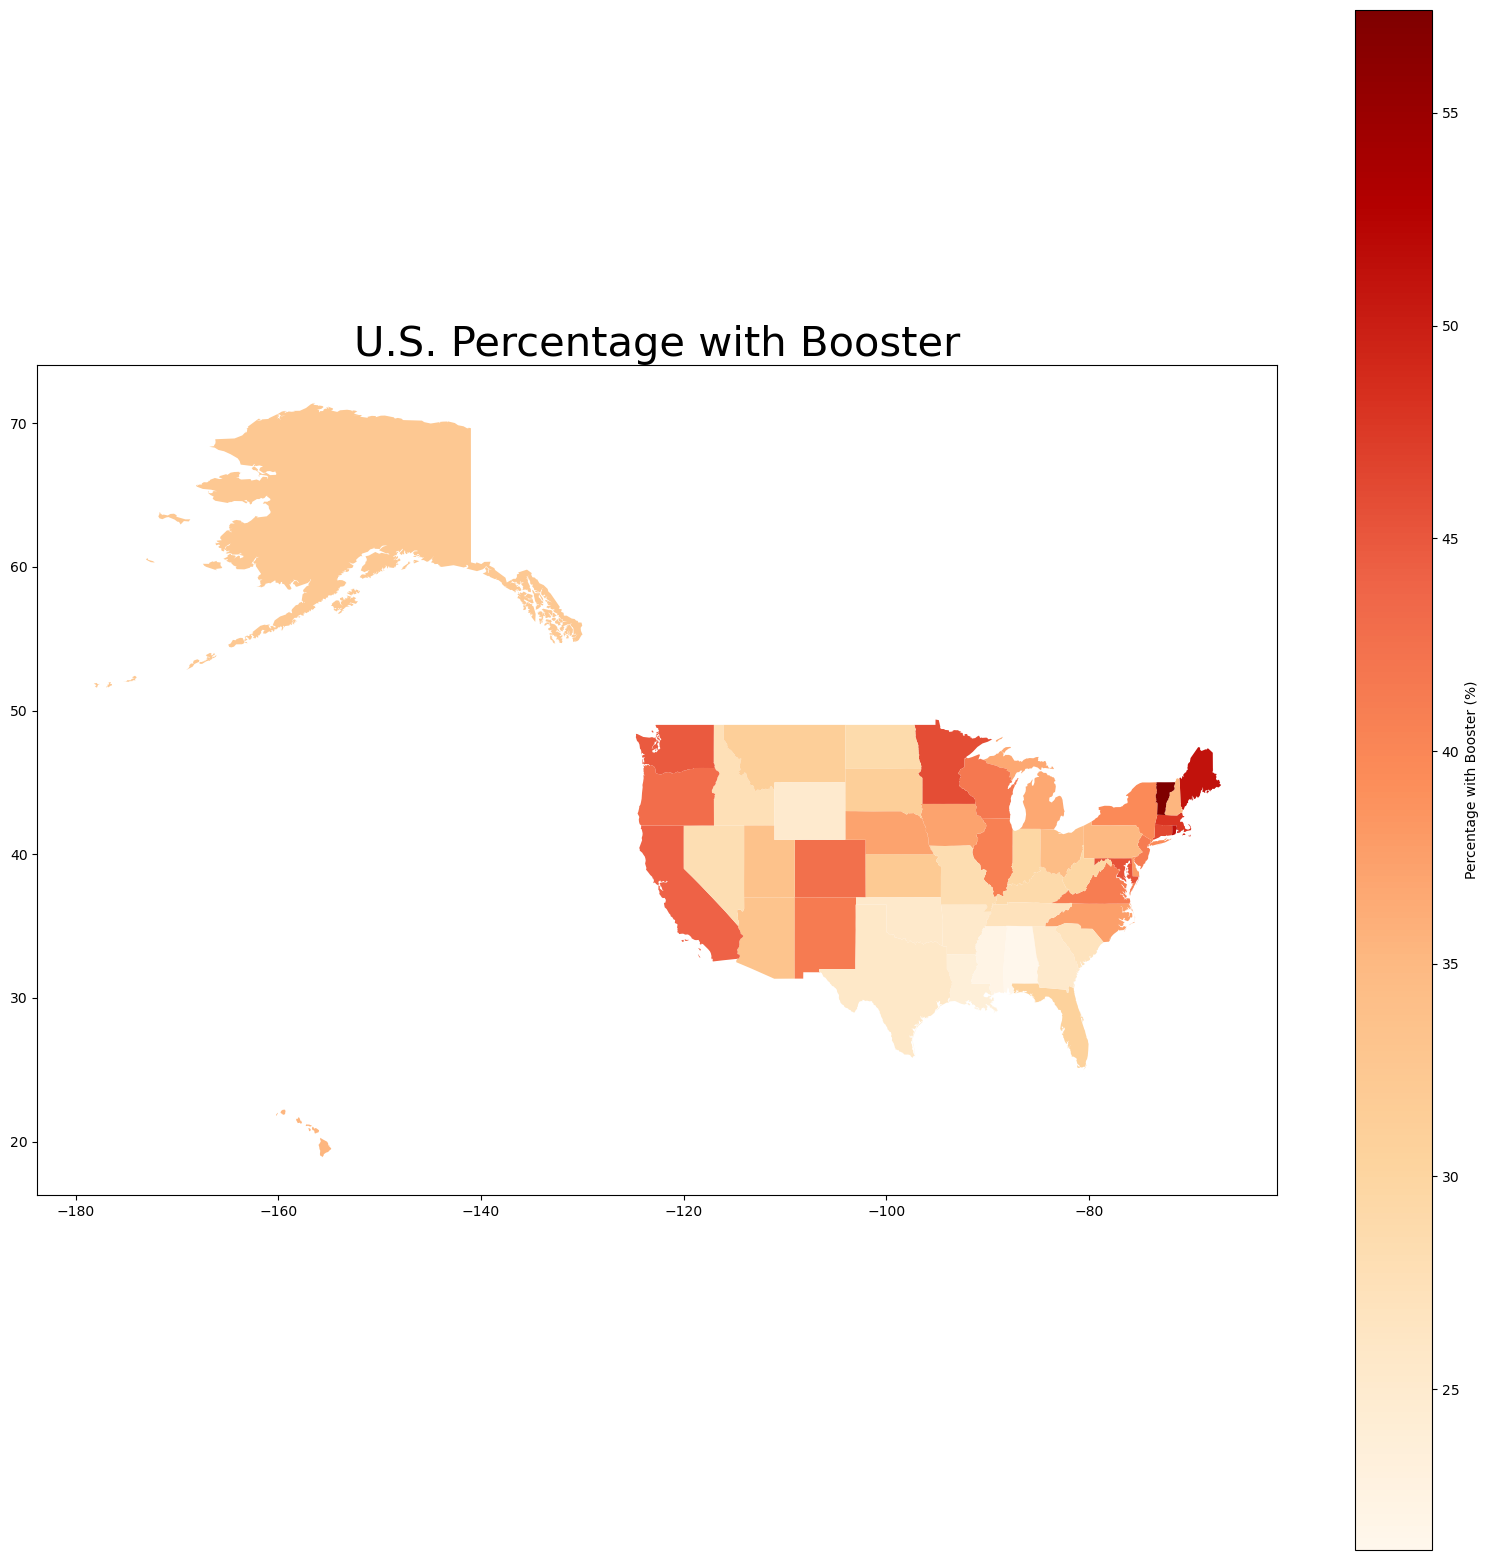

In [40]:
BoosterPlot = merged_df.plot(column='Percentage_with_Booster',
            cmap='OrRd',
            linewidth=0.9,
            figsize=(20,20),
            legend=True,
            legend_kwds={'label':"Percentage with Booster (%)",
                        'orientation':"vertical"})

BoosterPlot.set_title("U.S. Percentage with Booster")
BoosterPlot.title.set_size(30)

# Documentation

### Covid Data
- https://apidocs.covidactnow.org/

### Election Data
- https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv

### Geopandas Resources
- https://geopandas.org/en/stable/docs/user_guide/mapping.html
- https://pypi.org/project/Shapely/
- https://hub.arcgis.com/datasets/CMHS::states-shapefile/about

### Regression Resources
- https://realpython.com/linear-regression-in-python/
- https://scikit-learn.org/stable/